First, we import the necessary modules

In [8]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte, io
import numpy as np
from matplotlib import pyplot as plt

Setting up the image

In [9]:
img  = img_as_float(io.imread("breastmri.jpg"))

In [10]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=True))
denoise = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode = True, patch_size = 5, patch_distance=3, channel_axis = True)


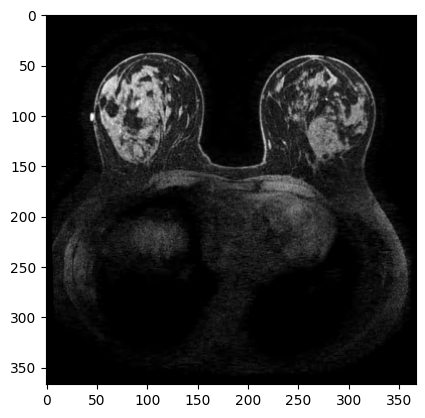

In [11]:
denoise_ubyte = img_as_ubyte(denoise)
plt.imshow(denoise_ubyte, cmap = "gray")

Plotting a histogram

(array([5.4483e+04, 1.6800e+02, 1.1400e+02, 1.0800e+02, 9.6000e+01,
        9.0000e+01, 9.6000e+01, 1.2000e+02, 3.9000e+01, 8.7000e+01,
        1.0800e+02, 5.1000e+01, 9.9000e+01, 3.3000e+01, 6.3000e+01,
        3.6000e+01, 7.5000e+01, 4.2000e+01, 9.0000e+01, 2.7000e+01,
        8.1000e+01, 6.3000e+01, 5.1000e+01, 5.1000e+01, 3.9000e+01,
        5.4000e+01, 1.5000e+01, 6.3000e+01, 1.2000e+01, 5.1000e+01,
        6.6000e+01, 1.8000e+01, 5.4000e+01, 4.2000e+01, 3.3000e+01,
        3.6000e+01, 5.7000e+01, 6.0000e+00, 4.5000e+01, 2.4000e+01,
        2.1000e+01, 5.1000e+01, 2.7000e+01, 3.9000e+01, 3.0000e+01,
        3.0000e+01, 3.6000e+01, 2.1000e+01, 2.7000e+01, 1.8000e+01,
        3.6000e+01, 2.7000e+01, 3.9000e+01, 2.1000e+01, 4.2000e+01,
        3.0000e+01, 1.8000e+01, 2.1000e+01, 4.5000e+01, 2.4000e+01,
        3.6000e+01, 4.5000e+01, 1.2000e+01, 2.7000e+01, 2.4000e+01,
        1.8000e+01, 3.6000e+01, 2.7000e+01, 3.6000e+01, 3.3000e+01,
        4.2000e+01, 3.0000e+01, 5.1000e+01, 2.40

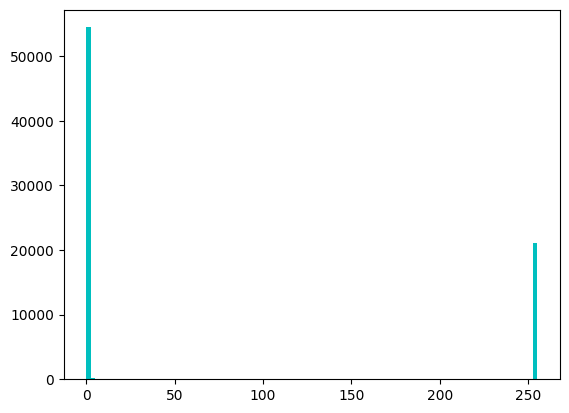

In [5]:
plt.hist(denoise_ubyte.flat, bins = 100, range = (0,255), color = "c")

Taking the 2nd standard deviation value into account

In [7]:
arr = [  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 ,  89.25,  91.8 ,  94.35,  96.9 ,  99.45,
        102.  , 104.55, 107.1 , 109.65, 112.2 , 114.75, 117.3 , 119.85,
        122.4 , 124.95, 127.5 , 130.05, 132.6 , 135.15, 137.7 , 140.25,
        142.8 , 145.35, 147.9 , 150.45, 153.  , 155.55, 158.1 , 160.65,
        163.2 , 165.75, 168.3 , 170.85, 173.4 , 175.95, 178.5 , 181.05,
        183.6 , 186.15, 188.7 , 191.25, 193.8 , 196.35, 198.9 , 201.45,
        204.  , 206.55, 209.1 , 211.65, 214.2 , 216.75, 219.3 , 221.85,
        224.4 , 226.95, 229.5 , 232.05, 234.6 , 237.15, 239.7 , 242.25,
        244.8 , 247.35, 249.9 , 252.45, 255.  ]
print("arr : ", arr)
print("95th percentile of rgb array : ",
      np.percentile(arr, 95))

arr :  [0.0, 2.55, 5.1, 7.65, 10.2, 12.75, 15.3, 17.85, 20.4, 22.95, 25.5, 28.05, 30.6, 33.15, 35.7, 38.25, 40.8, 43.35, 45.9, 48.45, 51.0, 53.55, 56.1, 58.65, 61.2, 63.75, 66.3, 68.85, 71.4, 73.95, 76.5, 79.05, 81.6, 84.15, 86.7, 89.25, 91.8, 94.35, 96.9, 99.45, 102.0, 104.55, 107.1, 109.65, 112.2, 114.75, 117.3, 119.85, 122.4, 124.95, 127.5, 130.05, 132.6, 135.15, 137.7, 140.25, 142.8, 145.35, 147.9, 150.45, 153.0, 155.55, 158.1, 160.65, 163.2, 165.75, 168.3, 170.85, 173.4, 175.95, 178.5, 181.05, 183.6, 186.15, 188.7, 191.25, 193.8, 196.35, 198.9, 201.45, 204.0, 206.55, 209.1, 211.65, 214.2, 216.75, 219.3, 221.85, 224.4, 226.95, 229.5, 232.05, 234.6, 237.15, 239.7, 242.25, 244.8, 247.35, 249.9, 252.45, 255.0]
95th percentile of rgb array :  242.25


In [30]:
#now we are taking cumalitive sum of 2nd standard deviation and forward
#this is all the pixels in the entire image


list=[1.71609e+05, 2.59320e+04, 1.46220e+04, 1.46640e+04, 9.96900e+03,
        1.24980e+04, 9.44400e+03, 1.08120e+04, 5.58300e+03, 1.05690e+04,
        1.07190e+04, 7.74600e+03, 9.78300e+03, 4.45200e+03, 8.44500e+03,
        3.72300e+03, 7.04400e+03, 3.17700e+03, 5.77200e+03, 2.48700e+03,
        4.65900e+03, 3.14100e+03, 1.73700e+03, 3.47700e+03, 1.53000e+03,
        2.08200e+03, 1.42500e+03, 2.51700e+03, 1.11900e+03, 1.48800e+03,
        1.50900e+03, 9.75000e+02, 1.83600e+03, 8.97000e+02, 1.18800e+03,
        8.07000e+02, 1.22400e+03, 7.56000e+02, 1.10400e+03, 7.53000e+02,
        9.90000e+02, 9.99000e+02, 6.57000e+02, 9.36000e+02, 5.82000e+02,
        8.97000e+02, 5.82000e+02, 9.39000e+02, 6.06000e+02, 9.15000e+02,
        8.70000e+02, 5.73000e+02, 8.73000e+02, 4.74000e+02, 7.41000e+02,
        4.65000e+02, 6.72000e+02, 2.34000e+02, 6.63000e+02, 3.72000e+02,
        5.85000e+02, 5.76000e+02, 3.72000e+02, 6.03000e+02, 3.09000e+02,
        2.40000e+02, 3.72000e+02, 4.35000e+02, 3.06000e+02, 2.70000e+02,
        4.08000e+02, 2.40000e+02, 3.12000e+02, 2.19000e+02, 1.89000e+02,
        1.56000e+02, 2.28000e+02, 1.38000e+02, 1.20000e+02, 9.30000e+01,
        1.29000e+02, 1.05000e+02, 4.20000e+01, 4.80000e+01, 4.20000e+01,
        3.90000e+01, 4.50000e+01, 1.80000e+01, 1.50000e+01, 1.80000e+01,
        2.40000e+01, 6.00000e+00, 3.00000e+00, 6.00000e+00, 6.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 9.00000e+00, 1.34713e+05]

scnd_dvtn_pixel = list[94]+list[95]+list[96]+list[97]+list[98]+list[99]
print(scnd_dvtn_pixel)


134731.0
0.0


In [25]:
#this is all the pixels in the entire image


new_list=[]
j=0

#

for i in range(0,len(list)):
    j+=list[i]
    new_list.append(j)

total_pixels = new_list[99]
print(total_pixels)

538756.0


In [33]:
#percentage

decimal = scnd_dvtn_pixel/total_pixels
percent = round(decimal * 100, 3)
print(str(percent) + "%")

#NOTE: this percentage is rounded to the nearest thousandth


25.008%


In [34]:
if percent < 25:
    print("Minimal")
elif percent >= 25 or percent < 50:
    print("Mild")
elif percent >= 50 or percent < 75:
    print("Moderate")
elif percent >= 75:
    print("Marked")



Mild


So as a result, since 25% of the image enhances, then the value is MILD